# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from PIL import Image
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
# dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(dimg, classes, boxes):
    # display an image and bounding boxes
    ax = plt.axis()
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]} 
    plt.imshow(dimg)
    ax=plt.gca()
    fac = 640
    for cl, bb in zip(classes, boxes):
        y1, x1, y2, x2 = bb
        w = float(x2 - x1)*fac
        h = float(y2 - y1)*fac
        x1 = float(x1)*fac
        y1 = float(y1)*fac
        x2 = float(x2)*fac
        y2 = float(y2)*fac
        cl = int(cl)
        rec = Rectangle(xy=(x1, y1), width=w, height=h, facecolor='none',edgecolor=colormap[cl])
        ax.add_patch(rec)
    plt.show()
    pass

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

Image 1


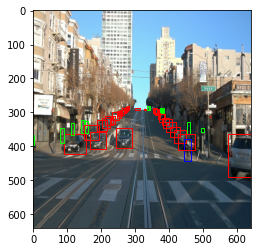

Image 2


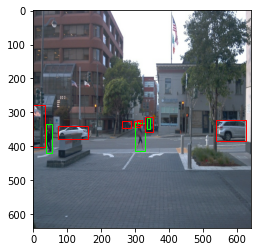

Image 3


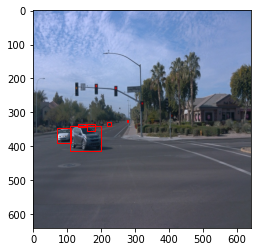

Image 4


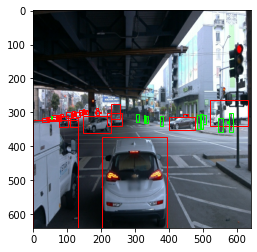

Image 5


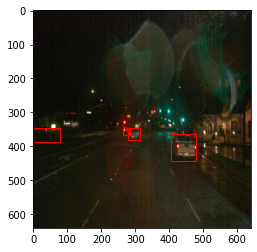

Image 6


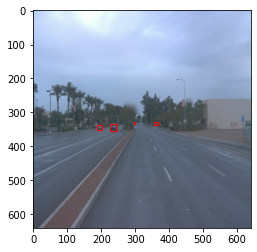

Image 7


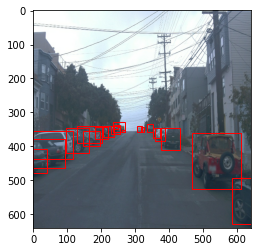

Image 8


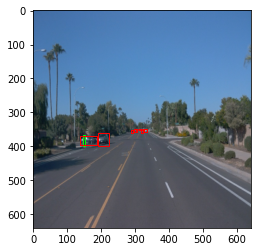

Image 9


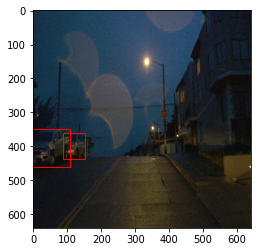

Image 10


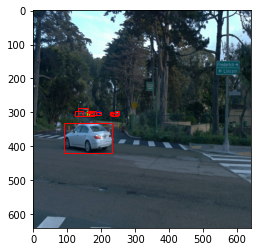

In [4]:
# Display 10 random images in dataset
num_imgs = 10
data = dataset.shuffle(38)
data = data.take(num_imgs)
idx = 1
for d in data.as_numpy_iterator():
    print('Image', idx); idx+=1
    image = d['image']
    classes = d['groundtruth_classes']
    boxes = d['groundtruth_boxes']
    npi = np.array(image)
    dimg = Image.fromarray(npi)
    display_images(dimg, classes, boxes)

## Strategy
- Size of cars is different, and we want this into account using data augments.
- Dense of cars looks good.
- There are few pedestriens data, we want to add the data for training.
- Image is dark, we'd like to add data under different wheater conditions. 

## Memo
- Use imgges taking how obstacles are dense into account. we want both dense and sparce scene data.
- Use images includes not only cars but also pedestrien and other type ob obstacles fot robustness.
- Scince there are many scenes wecan image, we want to take products we develop into account when we analyze data for machie leaning.

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [29]:
vehicle_dist = []
pedestrien_dist = []
cycle_dist = []
num_images = 0

data = dataset.shuffle(38)
data = data.take(num_imgs)
for d in data.as_numpy_iterator():
    num_images += 1
    vehicles = 0
    pedestriens = 0
    cycles = 0
    for cls in d['groundtruth_classes']:
        if cls == 1:
            vehicles += 1
        elif cls == 2:
            pedestriens += 1
        elif cls == 4:
            cycles += 1
    vehicle_dist.append(vehicles)
    pedestrien_dist.append(pedestriens)
    cycle_dist.append(cycles)
        
print("The number of vehicles:", sum(vehicle_dist), "means:", sum(vehicle_dist)/len(vehicle_dist))
print("The number of pedestriens:", sum(pedestrien_dist), "means:", sum(pedestrien_dist)/len(pedestrien_dist))
print("The number of cycles:", sum(cycle_dist), "means:", sum(cycle_dist)/len(cycle_dist))

The number of vehicles: 174 means: 17.4
The number of pedestriens: 14 means: 1.4
The number of cycles: 1 means: 0.1
